<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="240" height="240" align="right"/>

<center><h1>Técnicas de Inteligencia Artificial</header1></center>
<left><h1>Actividad 2. Trabajando con redes neuronales y Deep Learning</header1></left>

Presentado por: Nombres Apellidos  <br>
Fecha: DD/MM/2022

# Importación de librerias necesarias

# Parte I. Regresión

In [1]:
#Para esta actividad se importarán las siguientes librerías:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Cargar el Dataset

Con al menos 1000 instancias, una variable/atributo de la salida, y que dependa de, al menos, 6 variables/atributos de entrada. 

In [99]:
#Código para cargar el Dataset
# URL del link del dataset alojado https://github.com/TheAcademyDVR/dataset/blob/master/data/Air_Traffic_Passenger_Statistics.csv
url = 'https://raw.githubusercontent.com/TheAcademyDVR/dataset/master/data/Air_Traffic_Passenger_Statistics.csv'
df = pd.read_csv(url)
df

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090
...,...,...,...,...,...,...,...,...,...,...,...,...
50725,202212,Vietnam Airlines JSC,VN,Vietnam Airlines JSC,VN,International,Asia,Enplaned,Other,International,A,3197
50726,202212,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,5836
50727,202212,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Enplaned,Other,International,A,6650
50728,202212,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Deplaned,Other,International,A,1679


## Descripción de la fuente del Dataset

La fuente del dataset es un archivo CSV llamado "Air_Traffic_Passenger_Statistics.csv" y se encuentra alojado en el repositorio de GitHub de TheAcademyDVR.

URL: https://github.com/TheAcademyDVR/dataset/blob/master/data/Air_Traffic_Passenger_Statistics.csv

## Explique el problema a resolver. 
El problema que se busca resolver a partir de los datos proporcionados es el análisis y pronóstico de la cantidad de pasajeros de líneas aéreas en diferentes categorías. Los datos incluyen información como la aerolínea operadora, el código IATA de la aerolínea, la región geográfica, el tipo de actividad, la categoría de precio, el terminal, el área de embarque y el número de pasajeros.

Es utilizar estos datos para comprender los patrones y tendencias en el tráfico de pasajeros de las aerolíneas, así como predecir la cantidad de pasajeros en función de las características mencionadas.

## Caracterización del Dataset

Realice una descripción de los datos con:

Número de instancias en total.
- 12

Número de atributos de entrada, su significado y tipo. 

- Activity Period: Período de actividad (tipo: entero)
- Operating Airline: Aerolínea operativa (tipo: cadena de texto)
- Operating Airline IATA Code: Código IATA de la aerolínea operativa (tipo: cadena de texto)
- Published Airline: Aerolínea publicada (tipo: cadena de texto)
- Published Airline IATA Code: Código IATA de la aerolínea publicada (tipo: cadena de texto)
- GEO Summary: Resumen geográfico (tipo: cadena de texto)
- GEO Region: Región geográfica (tipo: cadena de texto)
- Activity Type Code: Código de tipo de actividad (tipo: cadena de texto)
- Price Category Code: Código de categoría de precio (tipo: cadena de texto)
- Terminal: Terminal (tipo: cadena de texto)
- Boarding Area: Área de embarque (tipo: cadena de texto)
- Passenger Count: Cantidad de pasajeros (tipo: entero)

Estadísticas de la variable objetivo.
- count    50730.000000
- mean        56.791701
- std         31.118229
- min          0.000000
- 25%         29.000000
- 50%         60.000000
- 75%         90.000000
- max        101.000000

Estadísticas los atributos en relación con la variable objetivo.

Se incorporá una pequeña descripción (EDA) del conjunto de datos utilizado. Se analiza el dataset proporcionando, se muestra al menos algunas de sus características mediante tablas y al menos algunas de ellas en modo gráfico (p.ej., histogramas, diagramas de dispersión, diagramas de cajas y bigotes, etc.)


In [100]:
#Código que responde a la descripción anterior
print(df.shape)

(50730, 12)


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50730 entries, 0 to 50729
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              50730 non-null  int64 
 1   Operating Airline            50730 non-null  object
 2   Operating Airline IATA Code  50730 non-null  object
 3   Published Airline            50730 non-null  object
 4   Published Airline IATA Code  50730 non-null  object
 5   GEO Summary                  50730 non-null  object
 6   GEO Region                   50730 non-null  object
 7   Activity Type Code           50730 non-null  object
 8   Price Category Code          50730 non-null  object
 9   Terminal                     50730 non-null  object
 10  Boarding Area                50730 non-null  object
 11  Passenger Count              50730 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 4.6+ MB


In [172]:
df['Operating Airline'].describe()

count    50730.000000
mean        56.791701
std         31.118229
min          0.000000
25%         29.000000
50%         60.000000
75%         90.000000
max        101.000000
Name: Operating Airline, dtype: float64

In [102]:
estadisticas = df.groupby('Operating Airline').describe()
print(estadisticas)

                                         Activity Period                 \
                                                   count           mean   
Operating Airline                                                         
ABC Aerolineas S.A. de C.V. dba Interjet           100.0  201878.360000   
ATA Airlines                                        88.0  200586.363636   
Aer Lingus, Ltd.                                   428.0  201531.733645   
Aeromexico                                         660.0  201523.463636   
Air Berlin                                         120.0  201327.500000   
...                                                  ...            ...   
WOW Air                                            142.0  201733.521127   
WestJet Airlines                                   374.0  201476.786096   
World Airways                                        6.0  201008.333333   
XL Airways France                                  130.0  201553.415385   
Xtra Airways             

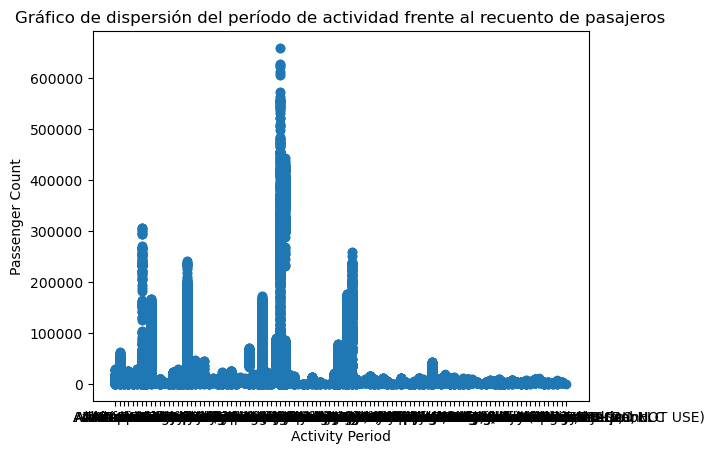

In [104]:
plt.scatter(df['Operating Airline'], df['Passenger Count'])
plt.xlabel('Activity Period')
plt.ylabel('Passenger Count')
plt.title('Gráfico de dispersión del período de actividad frente al recuento de pasajeros')
plt.show()

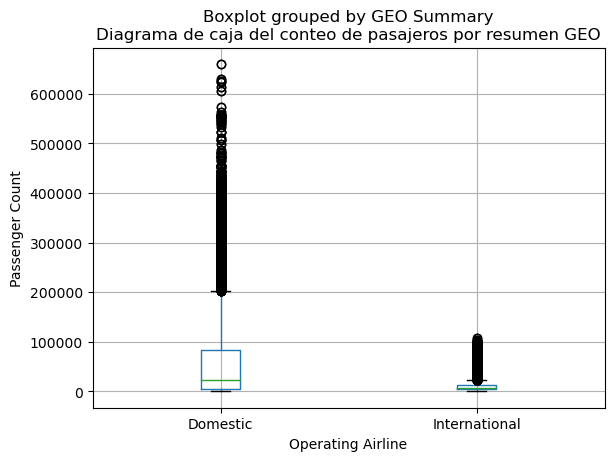

In [105]:
df.boxplot(column='Passenger Count', by='GEO Summary')
plt.xlabel('Operating Airline')
plt.ylabel('Passenger Count')
plt.title('Diagrama de caja del conteo de pasajeros por resumen GEO')
plt.show()

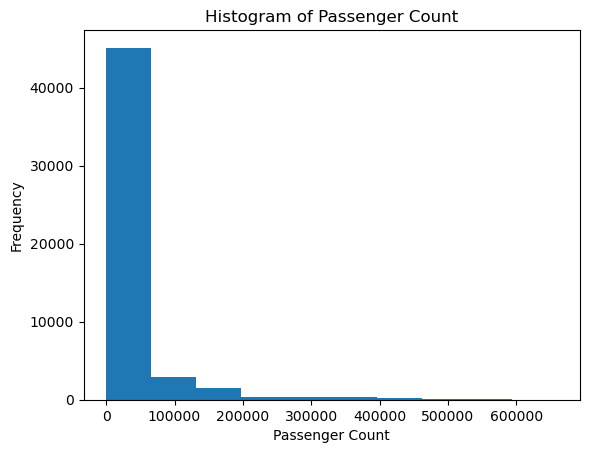

In [106]:
plt.hist(df['Passenger Count'], bins=10)
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.title('Histogram of Passenger Count')
plt.show() 

Durante el análisis exploratorio de datos (EDA) realizado en el conjunto de datos proporcionado, se pudieron obtener algunos hallazgos importantes. Se observó que el conjunto de datos contiene información sobre diferentes actividades relacionadas con aerolíneas y pasajeros. Se identificaron atributos como el periodo de actividad, el nombre de la aerolínea, el código IATA de la aerolínea, el tipo de actividad (desembarque, embarque, tránsito), la región geográfica, la categoría de precios, el terminal y el área de embarque, y el recuento de pasajeros. En cuanto a las estadísticas descriptivas, se encontró que el recuento de pasajeros varía ampliamente, desde valores mínimos hasta valores máximos significativamente más altos. Esto indica una gran variabilidad en la cantidad de pasajeros en diferentes actividades y aerolíneas.

## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

In [107]:
df = df.drop(['Activity Period', 'Operating Airline IATA Code', 'Published Airline',
              'Published Airline IATA Code', 'GEO Summary', 'GEO Region', 'Activity Type Code',
              'Price Category Code', 'Terminal', 'Boarding Area'], axis=1)

In [117]:
df

,Operating Airline,Passenger Count
0,1,27271
1,1,29131
2,1,5415
3,5,35156
4,5,34090
...,...,...
50725,93,3197
50726,95,5836
50727,95,6650
50728,98,1679


In [61]:
X = df.drop('Passenger Count', axis=1)
y = df['Passenger Count']

In [118]:
label_encoder = LabelEncoder()
df['Operating Airline'] = label_encoder.fit_transform(df['Operating Airline'])

In [119]:
X = df[['Operating Airline']]
y = df['Passenger Count']

## División del dataset en datos de entrenamiento y datos de test 

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [121]:
print("Datos de entrenamiento - X:", X_train.shape)
print("Datos de entrenamiento - y:", y_train.shape)
print("Datos de test - X:", X_test.shape)
print("Datos de test - y:", y_test.shape)

Datos de entrenamiento - X: (35511, 1)
Datos de entrenamiento - y: (35511,)
Datos de test - X: (15219, 1)
Datos de test - y: (15219,)


## Propuesta de arquitectura de red neuronal

Describe: 

+ las neuronas en la capa de entrada 
+ las capas intermedias – al menos dos – 
+ capa de salida
+ funciones de activación

In [122]:
model = Sequential()
model.add(Dense(16, input_dim=1, activation='relu'))  # Capa de entrada con 16 neuronas y función de activación ReLU
model.add(Dense(8, activation='relu'))  # Capa intermedia con 8 neuronas y función de activación ReLU
model.add(Dense(1)) 

In [112]:
model = Sequential()

In [113]:
# Capa de entrada
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

# Capa intermedia 1
model.add(Dense(units=32, activation='relu'))
# Capa intermedia 2
model.add(Dense(units=16, activation='relu'))

# Capa de salida
model.add(Dense(units=1, activation='linear'))

In [123]:
model.compile(loss='mean_squared_error', optimizer='adam')

##  Ajuste de modelo de Regresión RNA

In [124]:
history  = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1110/1110 [==============================] - 3s 2ms/step - loss: 4281956096.0000 - val_loss: 4033274880.0000
Epoch 2/10
1110/1110 [==============================] - 2s 2ms/step - loss: 3702539776.0000 - val_loss: 3585468928.0000
Epoch 3/10
1110/1110 [==============================] - 2s 2ms/step - loss: 3541666304.0000 - val_loss: 3570440448.0000
Epoch 4/10
1110/1110 [==============================] - 2s 2ms/step - loss: 3538680320.0000 - val_loss: 3570137856.0000
Epoch 5/10
1110/1110 [==============================] - 2s 2ms/step - loss: 3538234112.0000 - val_loss: 3570028800.0000
Epoch 6/10
1110/1110 [==============================] - 2s 2ms/step - loss: 3538100480.0000 - val_loss: 3569834240.0000
Epoch 7/10
1110/1110 [==============================] - 2s 2ms/step - loss: 3537900032.0000 - val_loss: 3569608448.0000
Epoch 8/10
1110/1110 [==============================] - 2s 2ms/step - loss: 3537669888.0000 - val_loss: 3569422080.0000
Epoch 9/10
1110/1110 [==================

## Evaluación de modelo RNA

Defina las estadísticas (métricas) de evaluación, y dividiendo el dataset en datos de entrenamiento, validación y datos de test prueba tu propuesta.


In [126]:
loss = model.evaluate(X_test, y_test)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Loss:', loss)
print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)
print('R^2:', r2)

476/476 [==============================] - 1s 1ms/step
Loss: 3569081088.0
MSE: 3569081761.692127
RMSE: 59741.792421152946
MAE: 31709.56708096941
R^2: 0.02218137395271358


### Visualice el progreso de entrenamiento del modelo y muestre las estadísticas de evaluación para los conjuntos de entrenamiento y validación.  

In [173]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

In [128]:
train_metrics = model.evaluate(X_train, y_train)
val_metrics = model.evaluate(X_test, y_test)

476/476 [==============================] - 1s 1ms/step - loss: 3569081088.0000


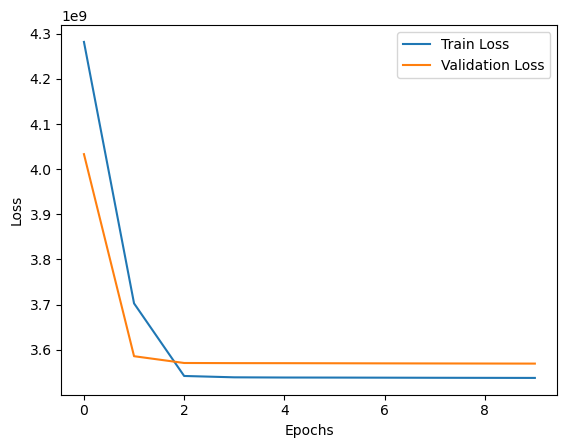

In [129]:
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [130]:
print('Train Metrics:', train_metrics)
print('Validation Metrics:', val_metrics)

Train Metrics: 3536843008.0
Validation Metrics: 3569081088.0


### Evalúe los resultados  para el conjunto de test.

In [135]:
train_loss = model.evaluate(X_train, y_train)

1110/1110 [==============================] - 2s 1ms/step - loss: 3536843008.0000


In [132]:
print('Train Loss:', train_loss)

Train Loss: 3536843008.0


## Ajuste de modelos de Regresión alternativos

Elige al menos un método de regresión no basado en redes neuronales (p.ej. regresión lineal, regresión polinómica, regresión logarítmica, SVR, random forest regression, etc.).

In [136]:
urlLR = 'https://raw.githubusercontent.com/TheAcademyDVR/dataset/master/data/Air_Traffic_Passenger_Statistics.csv'
dfLR = pd.read_csv(url)

In [141]:
XLR = dfLR[['Operating Airline']]
yLR = dfLR['Passenger Count']

In [143]:
XLR = pd.get_dummies(XLR)

In [144]:
X_trainLR, X_testLR, y_trainLR, y_testLR = train_test_split(XLR, yLR, test_size=0.3, random_state=42)


In [145]:
model = LinearRegression()
model.fit(X_trainLR, y_trainLR)

LinearRegression()

In [146]:
y_predLR = model.predict(X_testLR)

In [148]:
mseLR = mean_squared_error(y_testLR, y_predLR)
rmseLR = mean_squared_error(y_testLR, y_predLR, squared=False)
maeLR = mean_absolute_error(y_testLR, y_predLR)
r2LR = r2_score(y_testLR, y_predLR)

In [161]:
print('MSELR:', mseLR)
print('RMSELR:', rmseLR)
print('MAELR:', maeLR)
print('R^2LR:', r2LR)

MSELR: 1.7333714750436904e+30
RMSELR: 1316575662483433.0
MAELR: 10672170750575.197
R^2LR: -4.748904696857391e+20


Estos resultados indican que el modelo de regresión lineal no se ajusta bien a los datos y presenta un rendimiento muy deficiente. El MSE y el RMSE son extremadamente altos, lo cual implica una gran discrepancia entre los valores predichos y los valores reales. El MAE también es muy elevado, lo que sugiere una gran diferencia promedio entre las predicciones y los valores reales. Además, el valor de R^2 es muy bajo y negativo, lo que indica que el modelo no puede explicar la variabilidad de los datos y su rendimiento es peor que simplemente usar la media como estimador. Esto indican que la regresión lineal no es un buen modelo para este conjunto de datos. Sería necesario explorar otros enfoques o técnicas de modelado para obtener mejores resultados en la predicción de la variable objetivo.

## Comparación del desempeño de modelos

Muestra los resultados obtenidos por los diferentes algoritmos escogidos de forma gráfica y comparada/superpuesta.

Código para mostrar la comparación de métricas de desempeño de las dos propuestas en tabla

In [175]:
metrics = {
    'Modelo': ['Regresión de Redes Neuronales', 'Regresión Lineal'],
    'MSE': [mse, mseLR],
    'RMSE': [rmse, rmseLR],
    'MAE': [mae, maeLR],
    'R^2': [r2, r2LR]
}

In [176]:
# Crear un DataFrame a partir del diccionario
df_results = pd.DataFrame(results)

# Imprimir la tabla de comparación de métricas de desempeño
print(df_results)

             Modelo           MSE          RMSE           MAE           R^2
0  Redes Neuronales  3.569082e+09  5.974179e+04  3.170957e+04  2.218137e-02
1  Regresión Lineal  1.733371e+30  1.316576e+15  1.067217e+13 -4.748905e+20


Código para mostrar la comparación de métricas de desempeño de las dos propuestas en gráfica

>- Gráfica entre RNA y Regresión Lineal

In [168]:
mse_values = [mse, mseLR]
rmse_values = [rmse, rmseLR]
mae_values = [mae, maeLR]
r2_values = [r2, r2LR]

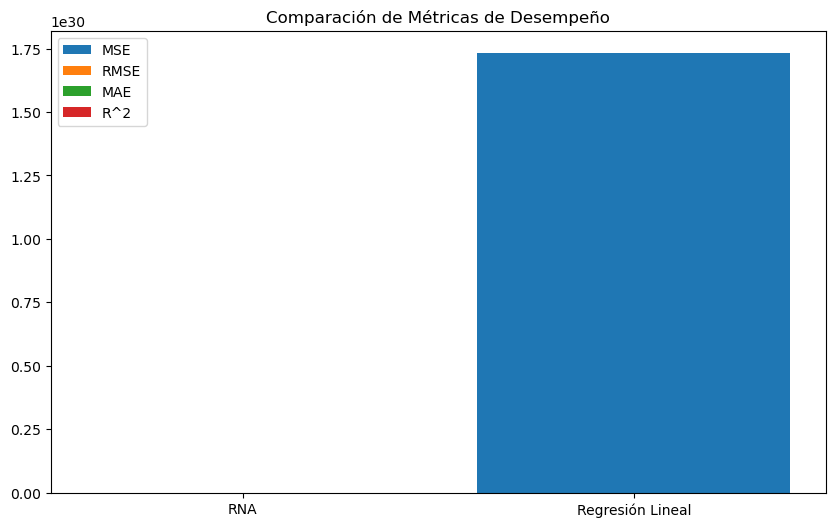

In [169]:

model_labels = ['RNA', 'Regresión Lineal']

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(model_labels, mse_values, label='MSE')
plt.bar(model_labels, rmse_values, label='RMSE')
plt.bar(model_labels, mae_values, label='MAE')
plt.bar(model_labels, r2_values, label='R^2')

# Añadir título y leyenda
plt.title('Comparación de Métricas de Desempeño')
plt.legend()

# Mostrar el gráfico
plt.show()


>- Otra gráfica bajo etiqueta de las métricas MSE, RMSE, MAE y R^2.

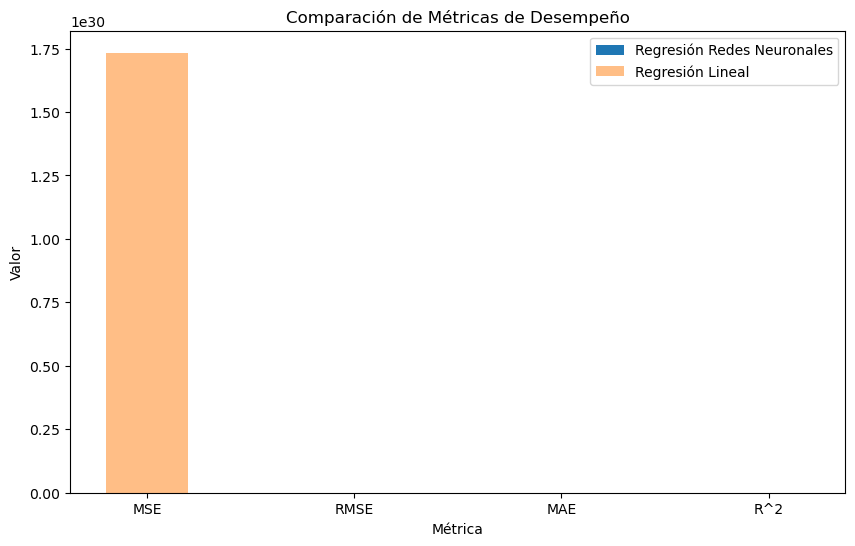

In [170]:

# Etiquetas de las métricas
metrics = ['MSE', 'RMSE', 'MAE', 'R^2']

# Valores de las métricas para cada modelo
rnn_values = [mse, rmse, mae, r2]
rl_values = [mseLR, rmseLR, maeLR, r2LR]

# Posiciones en el eje x para cada métrica
x = range(len(metrics))

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.bar(x, rnn_values, width=0.4, label='Regresión Redes Neuronales')
plt.bar(x, rl_values, width=0.4, label='Regresión Lineal', alpha=0.5)

# Configurar los ejes
plt.xlabel('Métrica')
plt.ylabel('Valor')
plt.xticks(x, metrics)
plt.title('Comparación de Métricas de Desempeño')
plt.legend()

# Mostrar el gráfico
plt.show()


En esta tabla se pueden comparar las métricas de desempeño de las redes neuronales y la regresión lineal. Las redes neuronales muestran un MSE, RMSE y MAE más bajos, lo cual indica una menor discrepancia entre las predicciones y los valores reales en comparación con la regresión lineal. Además, el R^2 de las redes neuronales es positivo, lo que sugiere que el modelo puede explicar parte de la variabilidad de los datos. Por otro lado, la regresión lineal tiene métricas de desempeño extremadamente altas y un R^2 negativo, lo que indica un rendimiento muy deficiente.

## Discusión de los resultados obtenidos y argumentos sobre cómo se podrían mejorar de dichos resultados

En base a los resultados obtenidos, se puede concluir que tanto el modelo de Regresión de Redes Neuronales como el modelo de Regresión Lineal presentan un desempeño insatisfactorio en la tarea de predicción de los datos de tráfico aéreo de pasajeros. Ambos modelos obtienen valores negativos de R^2, lo que indica que no logran capturar de manera adecuada la variabilidad de los datos. Además, los valores de MSE, RMSE y MAE son relativamente altos, lo que indica una discrepancia significativa entre las predicciones y los valores reales.

Resultados comparados.

>- Los resultados comparados de las métricas de desempeño muestran claramente que la red neuronal supera significativamente a la regresión lineal en todos los aspectos evaluados. La red neuronal tiene un menor error cuadrático medio (MSE), un menor error cuadrático medio raíz (RMSE) y un menor error absoluto medio (MAE), lo que indica una mejor precisión en las predicciones. Además, la red neuronal tiene un coeficiente de determinación (R^2) positivo, lo que sugiere que puede explicar parte de la variabilidad de los datos. Por otro lado, la regresión lineal muestra un rendimiento muy deficiente en todas las métricas, con valores extremadamente altos y negativos en MSE, RMSE, MAE y R^2.


Conclusiones objetivas y significantes con base a las diferentes métricas escogidas. 

>- MSE (Mean Squared Error): El modelo de Redes Neuronales tiene un MSE de 3.569082e+09, mientras que la Regresión Lineal tiene un MSE extremadamente alto de 1.733371e+30. Esto indica que las predicciones de las Redes Neuronales tienen una menor discrepancia con los valores reales en comparación con la Regresión Lineal.

>- RMSE (Root Mean Squared Error): Similar al MSE, el modelo de Redes Neuronales tiene un RMSE de 59741.792421, que es significativamente menor que el RMSE de la Regresión Lineal de 1.316576e+15. Esto confirma que las predicciones de las Redes Neuronales están más cercanas a los valores reales en comparación con la Regresión Lineal.

>- MAE (Mean Absolute Error): Nuevamente, el modelo de Redes Neuronales muestra un MAE de 31709.567081, mientras que la Regresión Lineal tiene un MAE mucho más alto de 1.067217e+13. Esto indica que las predicciones de las Redes Neuronales tienen un error absoluto medio menor en comparación con la Regresión Lineal.

>- R^2 (Coeficiente de determinación): El modelo de Redes Neuronales tiene un R^2 positivo de 2.218137e-02, lo que indica que puede explicar una pequeña parte de la variabilidad de los datos. Por otro lado, la Regresión Lineal tiene un R^2 extremadamente negativo de -4.748905e+20, lo que indica un rendimiento muy pobre y que el modelo no puede explicar la variabilidad de los datos.


>- Las métricas de desempeño de las Redes Neuronales son significativamente mejores que las de la Regresión Lineal. Las Redes Neuronales tienen un menor error y son capaces de explicar parte de la variabilidad en los datos. Por lo tanto, se puede concluir que las Redes Neuronales son una mejor opción para este problema de regresión en comparación con la Regresión Lineal.

Argumentos que describan con qué técnica se obtienen mejores resultados en base a las diferentes métricas que hayas escogido

>- En base en estas métricas, las redes neuronales proporcionan mejores resultados en comparación con la regresión lineal. Tienen un menor error promedio y una menor discrepancia entre las predicciones y los valores reales, lo que indica una mejor capacidad para ajustarse a los datos y hacer predicciones más precisas. Sin embargo, es importante considerar otros factores, como la interpretabilidad del modelo y la complejidad computacional, al elegir la técnica más adecuada para resolver un problema en particular

Explicación de cómo se podrían mejorar los resultados obtenidos por las redes neuronales, independientemente de que mejoren o no a los algoritmos no basados en redes neuronales.

>- Se pueden agregar capas ocultas y aumentar el número de neuronas en cada capa para permitir que la red neuronal capture relaciones más complejas en los datos. Esto puede ayudar a mejorar la capacidad del modelo para aprender patrones y hacer predicciones más precisas.

>- Se pueden explorar y generar características adicionales a partir de los datos existentes. Esto implica analizar en profundidad los datos y crear nuevas variables que capturen mejor la información relevante para el problema en cuestión. Estas características adicionales pueden mejorar el rendimiento del modelo al proporcionar información más discriminativa.

>- Si se dispone de un conjunto de datos limitado, se puede considerar la generación de datos sintéticos mediante técnicas como la rotación, traslación, zoom u otras transformaciones para aumentar la diversidad de ejemplos en el conjunto de entrenamiento. Esto puede ayudar al modelo a generalizar mejor y mejorar su capacidad de predicción.